In [1]:
import pandas as pd
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import numpy as np
import json
from collections import defaultdict, Counter
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
pip install pandas numpy scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install shap 

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
clinical = pd.read_csv("/Users/laiacoronassala/Desktop/predicting_immunotherapy_response/cleanclinicalKNN.csv")
radiomics= pd.read_csv("/Users/laiacoronassala/Desktop/VHIO/codisdef/aggregationmethods/186/3largest.csv")
radiomics = radiomics.rename(columns = {"Patient":"patient_id"})
radiomics = radiomics[[col for col in radiomics.columns if 'Unnamed' not in col]]
scaler = StandardScaler()
col = [col for col in radiomics.columns if 'patient' not in col]
radiomicsscaled = scaler.fit_transform(radiomics[col])
rad = pd.DataFrame(radiomicsscaled, columns=radiomics[col].columns)
rad = pd.concat([radiomics['patient_id'],rad], axis = 1)
df = pd.merge(rad,clinical, on = 'patient_id', how = "inner")
df

,patient_id,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,sex,treatment,encod_breast,encod_cervix,encod_colorectal,encod_head_and_neck,encod_lung,encod_other,encod_skin,cb_4mo
0,10013509,0.751064,0.395127,0.010323,0.244755,0.057469,0.282490,0.200317,0.223768,-0.258541,...,0,1,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,-0.5,0
1,10049517,0.423934,-0.485134,-0.244651,0.366215,0.246553,0.392102,-0.089139,0.253796,-0.179974,...,1,0,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,1
2,10262640,0.914401,0.763548,-0.123974,-0.038024,-0.045460,-0.024723,-0.030135,-0.024063,-0.227081,...,1,0,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,0
3,10599018,0.236836,-0.309328,-0.668926,-0.340266,-0.389124,-0.388513,-0.508746,-0.439308,-0.327854,...,1,0,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,1
4,10603027,0.680441,0.914353,0.338108,0.475949,0.367523,0.149542,0.491534,0.468251,-0.217097,...,1,1,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,19460793,-1.690923,-1.456164,-0.733311,-0.738697,-0.725963,-0.744883,-0.905201,-0.788921,-0.244019,...,1,0,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,1
182,260626,-1.376916,-1.304673,-1.098676,-1.190090,-1.135054,-1.138989,-1.169791,-1.186858,-0.348238,...,0,1,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,1
183,403069,1.118075,1.312402,0.087843,-0.149675,-0.106659,-0.103786,0.054874,-0.103275,-0.286048,...,1,1,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,0
184,412386,-0.194831,-0.201404,-0.561587,-0.597526,-0.647499,-0.589175,-0.521565,-0.622794,-0.310165,...,0,1,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,-0.5,1


In [7]:
radiomics = radiomics[[col for col in radiomics.columns if 'Unnamed' not in col]]
scaler = StandardScaler()
col = [col for col in radiomics.columns if 'patient' not in col]
radiomicsscaled = scaler.fit_transform(radiomics[col])
rad = pd.DataFrame(radiomicsscaled, columns=radiomics[col].columns)
rad = pd.concat([radiomics['patient_id'],rad], axis = 1)
df = pd.merge(rad,clinical, on = 'patient_id', how = "inner")
df

,patient_id,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,sex,treatment,encod_breast,encod_cervix,encod_colorectal,encod_head_and_neck,encod_lung,encod_other,encod_skin,cb_4mo
0,10013509,0.751064,0.395127,0.010323,0.244755,0.057469,0.282490,0.200317,0.223768,-0.258541,...,0,1,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,-0.5,0
1,10049517,0.423934,-0.485134,-0.244651,0.366215,0.246553,0.392102,-0.089139,0.253796,-0.179974,...,1,0,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,1
2,10262640,0.914401,0.763548,-0.123974,-0.038024,-0.045460,-0.024723,-0.030135,-0.024063,-0.227081,...,1,0,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,0
3,10599018,0.236836,-0.309328,-0.668926,-0.340266,-0.389124,-0.388513,-0.508746,-0.439308,-0.327854,...,1,0,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,-0.5,1
4,10603027,0.680441,0.914353,0.338108,0.475949,0.367523,0.149542,0.491534,0.468251,-0.217097,...,1,1,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,19460793,-1.690923,-1.456164,-0.733311,-0.738697,-0.725963,-0.744883,-0.905201,-0.788921,-0.244019,...,1,0,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,1
182,260626,-1.376916,-1.304673,-1.098676,-1.190090,-1.135054,-1.138989,-1.169791,-1.186858,-0.348238,...,0,1,-0.5,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,1
183,403069,1.118075,1.312402,0.087843,-0.149675,-0.106659,-0.103786,0.054874,-0.103275,-0.286048,...,1,1,-0.5,-0.5,-0.5,-0.5,0.5,-0.5,-0.5,0
184,412386,-0.194831,-0.201404,-0.561587,-0.597526,-0.647499,-0.589175,-0.521565,-0.622794,-0.310165,...,0,1,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,-0.5,1


In [8]:
df.to_csv("combinedKNN.csv")

In [9]:
#ML
def lasso_fselection(X_train, y_train, inner_cv):
    pipe = Pipeline([
        ('selector', SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=500, random_state=123))),
        ('classifier', LogisticRegression(penalty='elasticnet', solver='saga', max_iter=500))
    ])
    param_distributions = {
        'selector__estimator__C': [0.01, 0.1, 1, 10],  
        'classifier__l1_ratio': [0.3,0.5,1]
    }
    
    rs = RandomizedSearchCV(pipe, param_distributions=param_distributions, n_iter=30, scoring='roc_auc', cv=inner_cv)
    rs.fit(X_train, y_train.values.ravel())
    selected_features = X_train.columns[rs.best_estimator_.named_steps['selector'].get_support()]
    results = {
        'selected_features': selected_features,
        'estimator_C': rs.best_params_['selector__estimator__C'],
        'l1_ratio': rs.best_params_['classifier__l1_ratio']
    }
    return results

def flexible_nested_cv_optimized(X, y, outer_cv, inner_cv):

    inner_results = []
    outer_results = []
    
    outer_fold_counter = 1  

    for train_idx_outer, val_idx_outer in outer_cv.split(X, y):
        feature_counts = defaultdict(int)
        C_counts = defaultdict(int)
        l1_ratio_counts = defaultdict(int)
        
        inner_fold_counter = 1  

        for train_idx_inner, val_idx_inner in inner_cv.split(X.iloc[train_idx_outer], y.iloc[train_idx_outer]):
            X_train_inner, y_train_inner = X.iloc[train_idx_inner], y.iloc[train_idx_inner]
            X_val_inner, y_val_inner = X.iloc[val_idx_inner], y.iloc[val_idx_inner]
            
            results_inner = lasso_fselection(X_train_inner, y_train_inner, inner_cv)
            final_features = results_inner['selected_features']
         
            for feature in final_features:
                feature_counts[feature] += 1
            C_counts[results_inner['estimator_C']] += 1
            l1_ratio_counts[results_inner['l1_ratio']] += 1
            
            inner_model = LogisticRegression(penalty='elasticnet', solver='saga', C=results_inner['estimator_C'], 
                                             l1_ratio=results_inner['l1_ratio'], max_iter=500, random_state=123)
            
            inner_model.fit(X_train_inner[final_features], y_train_inner.values.ravel())
            y_pred_inner = inner_model.predict_proba(X_val_inner[final_features])[:, 1]
            auc_inner = roc_auc_score(y_val_inner, y_pred_inner)
            
            inner_results.append({
                'Fold': 'outer_' + str(outer_fold_counter)+'_inner_' + str(inner_fold_counter),
                'Features': final_features, 
                'C': results_inner['estimator_C'], 
                'l1_ratio': results_inner['l1_ratio'],
                'AUC': auc_inner
            })
        
            inner_fold_counter += 1  

        most_common_features = [feature for feature, _ in Counter(feature_counts).most_common(5)]  
        most_common_C = Counter(C_counts).most_common(1)[0][0]
        most_common_l1_ratio = Counter(l1_ratio_counts).most_common(1)[0][0]
        
        X_train_outer, y_train_outer = X.iloc[train_idx_outer], y.iloc[train_idx_outer]
        X_val_outer, y_val_outer = X.iloc[val_idx_outer], y.iloc[val_idx_outer]
        
        final_model = LogisticRegression(penalty='elasticnet', solver='saga', C=most_common_C, l1_ratio=most_common_l1_ratio, max_iter=500, random_state=123)
        final_model.fit(X_train_outer[most_common_features], y_train_outer.values.ravel())
        y_pred_outer = final_model.predict_proba(X_val_outer[most_common_features])[:, 1]
        auc_outer = roc_auc_score(y_val_outer, y_pred_outer)
        
        outer_results.append({
            'Fold': 'outer_fold_' + str(outer_fold_counter),  
            'Features': most_common_features,
            'C': most_common_C,
            'l1_ratio': most_common_l1_ratio,
            'AUC': auc_outer
        })
        
        outer_fold_counter += 1 

    return pd.DataFrame(inner_results), pd.DataFrame(outer_results)

def final_model(X, y, outer_results_df, odir):
    all_features = [feat for sublist in outer_results_df['Features'].tolist() for feat in sublist]
    most_common_features = [feature for feature, _ in Counter(all_features).most_common(5)]
    
    most_common_C = Counter(outer_results_df['C']).most_common(1)[0][0]
    most_common_l1_ratio = Counter(outer_results_df['l1_ratio']).most_common(1)[0][0]
    
    final_model = LogisticRegression(penalty='elasticnet', solver='saga', C=most_common_C, 
                                     l1_ratio=most_common_l1_ratio, max_iter=500)
    final_model.fit(X[most_common_features], y.values.ravel())
    
    coefficients = final_model.coef_[0]
    intercept = final_model.intercept_[0]
    
    avg_auc = outer_results_df['AUC'].mean()
    print(avg_auc)
    std_auc = outer_results_df['AUC'].std()
    
    results = {
        'Average AUC': avg_auc,
        'Standard Deviation AUC': std_auc,
        'Most Common Hyperparameters': {
            'C': most_common_C,
            'l1_ratio': most_common_l1_ratio
        },
        'Model Coefficients': dict(zip(most_common_features, coefficients)),
        'Model Intercept': intercept,
        'Selected Features': most_common_features
    }
    
    explainer = shap.LinearExplainer(final_model, X[most_common_features], feature_perturbation="interventional")
    shap_values = explainer.shap_values(X[most_common_features])
    shap.summary_plot(shap_values, X[most_common_features], feature_names=most_common_features)
    
    final_model_path = os.path.join(odir, name + ".json")
    with open(final_model_path, 'w') as f:
        json.dump(results, f, indent=4)

    return final_model_path

The total space of parameters 12 is smaller than n_iter=30. Running 12 iterations. For exhaustive searches, use GridSearchCV.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
No features were selected: either the data is too noisy or the selection test too strict.
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
No features were selected: either the da

0.7851960784313725


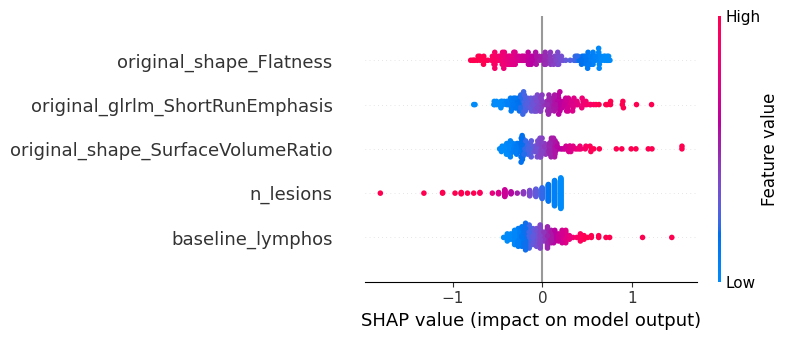

In [10]:
Xdef = df[[col for col in df.columns if 'patient' not in col and 'cb_4mo' not in col and 'Unnamed' not in col]]
y = df['cb_4mo']
odir = '/Users/laiacoronassala/Desktop/predicting_immunotherapy_response'
name = 'combinedmodelKNN-0.5'
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
inner_results_df, outer_results_df=flexible_nested_cv_optimized(Xdef, y, outer_cv, inner_cv)
final_results = final_model(Xdef, y, outer_results_df, odir)